# This notebook contains the functions which can augment IMU data and compare the augmented and measured data
### This node is to study data augmentation methods

In [1]:
import sys
import os
sys.path.append("./../")
from vicon_imu_data_process.process_landing_data import *
from vicon_imu_data_process.augmentation_data import *
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def get_rotmatirx(rot_angles):
    '''
    get rotation matrix of the IMU
    
    '''
    rot_matrix= []
    assert(isinstance(rot_angles,dict))
    assert(list(rot_angles.keys())==['x_angles','y_angles','z_angles'])
    for x in rot_angles['x_angles']:
        for y in rot_angles['y_angles']:
            for z in rot_angles['z_angles']:
                rot_matrix.append(np.dot(np.dot(rotmat.R('x',x),rotmat.R('y',y)),rotmat.R('z',z)))
                
    return rot_matrix


if False:
    subjects_trials = set_subjects_trials(selected=True, landing_manner='double_legs')
    subjects_trials_dataset = load_subjects_dataset(subjects_trials)
    rot_angles = {'x_angles':np.linspace(-5,5,5),'y_angles':np.linspace(-5,5,5),'z_angles':np.linspace(-10,10,9)}
    print(rot_angles['z_angles'])
    rot_matrix = get_rotmatirx(rot_angles)
    #print(rot_matrix)
    augment_subjects_trials_dataset = imu_data_augment(subjects_trials_dataset,rot_matrix)
    save_subjects_dataset_to_a_h5(augment_subjects_trials_dataset,'4_augment_features_labels_rawdatasets.hdf5')

## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

In [6]:
# Visual Python
!pip install visualpython --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 1.3 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [7]:
# Visual Python
!visualpy install

Package install command: pip
Copy visualpyhthon extension files ...
--------------------------------------------------------------------------------------------
Source Dir :  /home/sun/.pyenv/versions/3.9.2/envs/machinelearning/lib/python3.9/site-packages/visualpython
Target Dir :  /home/sun/.local/share/jupyter/nbextensions/visualpython
Enabling notebook extension visualpython/visualpython...
      - Validating: OK


In [11]:
list(rot_angles.keys())==['x_angles','y_angles','z_angless']

False

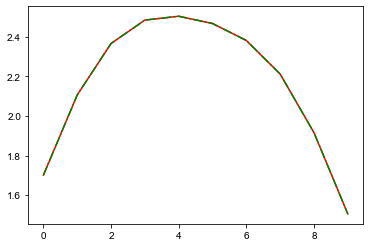

In [327]:
mod_acc = np.linalg.norm(acc[:10], axis=1, keepdims=True)
mod_aug_acc = np.linalg.norm(aug_acc[:10], axis=1, keepdims=True)
plt.plot(mod_acc,'r')
plt.plot(mod_aug_acc,'g-.')

In [308]:
augment_subjects_trials_dataset[subject_id_name][trial]

,CHEST_Accel_X,CHEST_Accel_Y,CHEST_Accel_Z,CHEST_Gyro_X,CHEST_Gyro_Y,CHEST_Gyro_Z,CHEST_Mag_X,CHEST_Mag_Y,CHEST_Mag_Z
0,-0.529284,1.591748,-0.280225,0.177825,0.249810,0.007012,-0.646333,-0.763389,-0.064076
1,-0.485439,2.041983,-0.174513,0.079012,0.272969,-0.005764,-0.645163,-0.763223,-0.063616
2,-0.428482,2.325879,-0.079297,-0.038347,0.300555,-0.018686,-0.644144,-0.763040,-0.065015
3,-0.354049,2.459265,0.004366,-0.173117,0.323917,-0.030275,-0.643428,-0.762878,-0.068528
4,-0.253079,2.490226,0.074007,-0.318949,0.334890,-0.039687,-0.642996,-0.762752,-0.073846
...,...,...,...,...,...,...,...,...,...
75,0.376893,9.846751,0.805812,-0.226227,0.017771,0.027232,-0.626086,-0.761674,-0.190566
76,0.273170,9.600551,0.754769,-0.247374,0.008044,0.029971,-0.626648,-0.760780,-0.192430
77,0.167928,9.401219,0.701484,-0.251652,0.000976,0.030314,-0.626872,-0.760157,-0.194495
78,0.072419,9.255319,0.650203,-0.238941,-0.003366,0.028961,-0.626892,-0.760025,-0.196309


0
[[ 0.9961947  -0.08715574  0.        ]
 [ 0.08715574  0.9961947   0.        ]
 [ 0.          0.          1.        ]]


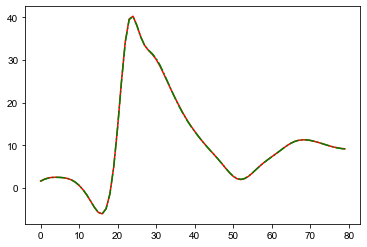

In [275]:
# 旋转矩阵生成
rot_angle = 0
print(rot_angle)
rot_mat = rotmat.R(2,5)
print(rot_mat)

cal_acc = np.dot(rot_mat, my_sensor.acc.T).T
cal_omega = np.dot(rot_mat, my_sensor.omega.T).T
cal_mag = np.dot(rot_mat, my_sensor.mag.T).T

transfer_data = {'rate':100,
               'acc': cal_acc,
               'omega':cal_omega,
               'mag':cal_mag}

my_sensor2 = MyOwnSensor(in_file='My own 2 sensor.', in_data=transfer_data)


plt.plot(my_sensor.acc[:,1],'r')
plt.plot(my_sensor2.acc[:,1],'g-.')
#my_sensor2.set_qtype('madgwick')

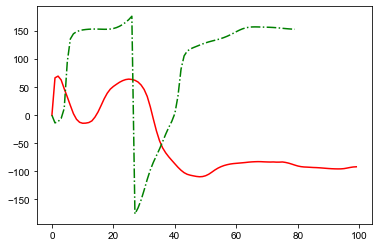

In [277]:

cal_seq = quat.quat2seq(my_sensor2.quat, seq='Euler')
plt.plot(seq[:,2],'r')
plt.plot(cal_seq[:,2],'g-.')

## Load measured data and augmented datas

In [2]:
# load the selected subjects data
subject_num=15; trial_num=25
base_name = "kem_norm_landing_data.hdf5"
prefix_name = str(subject_num)+"sub_"+str(trial_num)+"tri_"
h5_file_name = os.path.join(DATA_PATH,"selection/selection_"+prefix_name+base_name)
print(h5_file_name)
measured_subjects_trials_data = load_subjects_dataset(h5_file_name=h5_file_name)

/media/sun/TFcard/drop_landing_workspace/data/selection/selection_15sub_25tri_kem_norm_landing_data.hdf5


In [3]:
# load the augmented subjects data
subject_num=15; trial_num=25;rot_id=5
prefix_name = str(rot_id)+"rotid_"+str(subject_num)+"sub_"+str(trial_num)+"tri_"
h5_file_name = os.path.join(DATA_PATH,"augmentation/augmentation_"+prefix_name+base_name)
augmented_subjects_trials_data = load_subjects_dataset(h5_file_name=h5_file_name)

In [17]:
measured_subjects_trials_data['P_08_zhangboyuan'].keys()

dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'])

In [18]:
subject_id_name='P_08_zhangboyuan'
trial_id='01'
mdata = measured_subjects_trials_data[subject_id_name][trial_id]

aug_num_of_a_trial = len(augmented_subjects_trials_data[subject_id_name].keys())/trial_num
nonrot_trial_idx=int(round((aug_num_of_a_trial-1)/2+1))

adata_1 = augmented_subjects_trials_data[subject_id_name][trial_id+'_'+str(nonrot_trial_idx+3)]
adata_2 = augmented_subjects_trials_data[subject_id_name][trial_id+'_'+str(nonrot_trial_idx-3)]

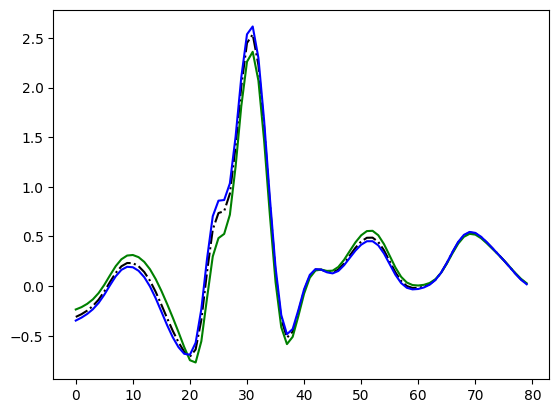

In [19]:
plt.plot(mdata['CHEST_Accel_X'],'k-.')
plt.plot(adata_1['CHEST_Accel_X'],'g')
plt.plot(adata_2['CHEST_Accel_X'],'b')

### Checking data loader

In [20]:
import sys
import os
sys.path.append("./../DeepDA")
from main import *


"""Get default arguments."""
parser = configargparse.ArgumentParser()
parser.add_argument('--labels_name',type=str,nargs='+')      # option that takes a value

args = parser.parse_args(args=[])

subject_num=15; trial_num=25
base_name = "kem_norm_landing_data.hdf5"
prefix_name = str(subject_num)+"sub_"+str(trial_num)+"tri_"
tst = os.path.join("selection/selection_"+prefix_name+base_name)
print(tst)
setattr(args, "tst_domain",tst)


# load the augmented subjects data
subject_num=15; trial_num=25;rot_id=5
prefix_name = str(rot_id)+"rotid_"+str(subject_num)+"sub_"+str(trial_num)+"tri_"
tre = os.path.join("augmentation/augmentation_"+prefix_name+base_name)
print(tre)
setattr(args, "tre_domain",tre)

parser.set_defaults(data_dir=const.DATA_PATH)


#data path
args.data_dir = const.DATA_PATH

# features
features_name = ['TIME'] + const.extract_imu_fields(const.IMU_SENSOR_LIST, const.ACC_GYRO_FIELDS)
setattr(args, "features_name", features_name)
setattr(args, "n_labels", 1)
setattr(args, "labels_name", ["R_KNEE_MOMENT_X"])
setattr(args,'src_domain','None')
setattr(args,'tcl_domain','None')
setattr(args,'batch_size',1)
setattr(args,'num_workers',1)

#
#
multiple_domain_datasets = open_datafile(args)

selection/selection_15sub_25tri_kem_norm_landing_data.hdf5
augmentation/augmentation_5rotid_15sub_25tri_kem_norm_landing_data.hdf5


In [21]:
mdata1_1 = multiple_domain_datasets['tst'][subject_id_name][trial_id]
adata1_1 = multiple_domain_datasets['tre'][subject_id_name][trial_id+'_'+str(nonrot_trial_idx+3)]

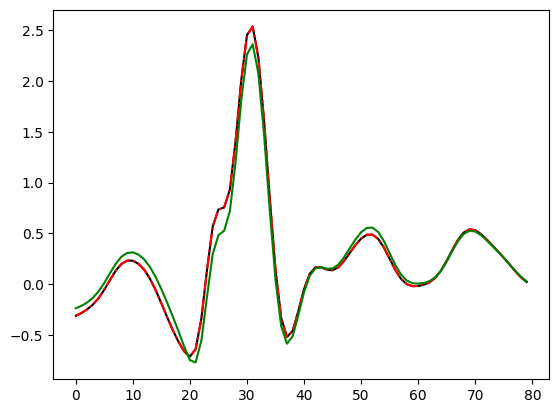

In [22]:
plt.plot(mdata['CHEST_Accel_X'],'k')
plt.plot(mdata1_1['CHEST_Accel_X'],'r-.')
plt.plot(adata1_1['CHEST_Accel_X'],'g')

In [10]:
domain_data_loaders, n_labels = load_data(args, multiple_domain_datasets)

In [11]:
x1 = next(iter(domain_data_loaders['tre']))
y1 = next(iter(domain_data_loaders['tst']))

In [12]:
x11 = x1[0].squeeze().reshape(80,-1)
y11 = y1[0].squeeze().reshape(80,-1)
x111=x11.numpy()
y111=y11.numpy()

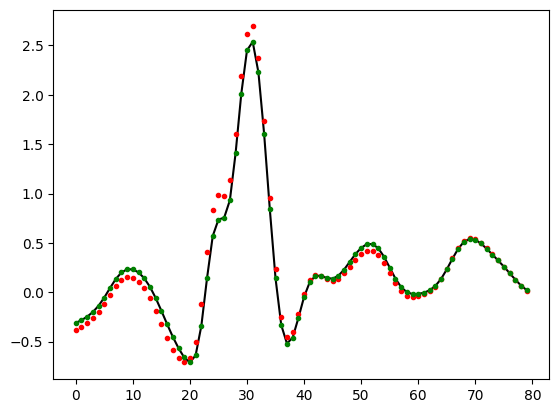

In [25]:
plt.plot(mdata['CHEST_Accel_X'],'k')
#plt.plot(mdata1_1['CHEST_Accel_X'],'r-.')
#plt.plot(adata1_1['CHEST_Accel_X'],'g')
plt.plot(x111[:,features_name.index('CHEST_Accel_X')],'r.')
plt.plot(y111[:,features_name.index('CHEST_Accel_X')],'g.')

In [71]:
features_name.index('TIME')

0